In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1

In [2]:
import TELF;TELF.__version__

'0.0.34'

In [3]:
from TELF.factorization import NMFk
import os 

params = {
    "n_perturbs":30,
    "n_iters":200,
    "epsilon":0.015,
    "n_jobs":-1,
    "init":"nnsvd", 
    "use_gpu":False,
    "save_path":os.path.join("..", "..", "results"), 
    "save_output":True,
    "collect_output":True,
    "predict_k_method":"sill",
    "verbose":True,
    "nmf_verbose":False,
    "transpose":False,
    "sill_thresh":.8,
    "pruned":True,
    'nmf_method':'nmf_fro_mu', # nmf_fro_mu, nmf_recommender
    "calculate_error":True,
    "predict_k":True,
    "use_consensus_stopping":0,
    "calculate_pac":True,
    "consensus_mat":True,
    "perturb_type":"uniform",
    "perturb_multiprocessing":False,
    "perturb_verbose":False,
    "simple_plot":True,
    "k_search_method":"bst_pre",
    "H_sill_thresh":0.1,
    "clustering_method":"kmeans",
    "device":-1,
}
Ks = range(1, 21, 1)
name = "Example_NMFk"
note = "This is an example run of NMFk"

model = NMFk(**params)

/home/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


n_perturbs: 30
perturb_type: uniform
n_iters: 200
epsilon: 0.015
init: nnsvd
save_path: ../../results
save_output: True
use_gpu: False
verbose: True
nmf_verbose: False
perturb_verbose: False
transpose: False
collect_output: True
sill_thresh: 0.8
predict_k: True
predict_k_method: WH_sill
n_jobs: 192
n_nodes: 1
nmf: <function nmf at 0x73f6010219e0>
nmf_method: nmf_fro_mu
nmf_obj_params: {}
clustering_obj_params: {}
pruned: True
calculate_error: True
consensus_mat: True
use_consensus_stopping: 0
mask: None
calculate_pac: True
simple_plot: True
get_plot_data: False
perturb_multiprocessing: False
k_search_method: bst_pre
H_sill_thresh: 0.1
factor_thresholding: None
factor_thresholding_H_regression: None
factor_thresholding_obj_params: {}
factor_thresholding_H_regression_obj_params: {}
clustering_method: kmeans
device: [-1]
lock: <unlocked _thread.lock object at 0x73f60101d080>
K_search_settings: {'lock': <unlocked _thread.lock object at 0x73f60224e000>, 'k_search_method': 'bst_pre', 'sill_t

/home/maksim/repositories/telf_internal/TELF/factorization/NMFk.py:835: UserWarning: predict_k_method is defaulted to WH_sill!
  warnings.warn("predict_k_method is defaulted to WH_sill!")
/home/maksim/repositories/telf_internal/TELF/factorization/NMFk.py:842: UserWarning: calculate_pac is True. PAC calculation for large matrices can take long time. For large matrices, instead use consensus_mat=True and calculate_pac=False.
  warnings.warn("calculate_pac is True. PAC calculation for large matrices can take long time. For large matrices, instead use consensus_mat=True and calculate_pac=False.")
/home/maksim/repositories/telf_internal/TELF/factorization/NMFk.py:853: UserWarning: calculate_error is True! Error calculation can make the runtime longer and take up more memory space!
  warnings.warn(


In [4]:
import sys; sys.path.append(os.path.join("..", "..", "scripts"))
from generate_X import gen_data,gen_data_sparse

Xsp = gen_data_sparse(shape=[500, 500], density=0.01)["X"]
X = gen_data(R=4, shape=[200, 200])["X"]

/home/maksim/repositories/telf_internal/examples/NMFk/../../scripts/generate_X.py:60: UserWarning: Kruskal's theorem probably won't apply, may not have a unique nCPD.
  warnings.warn("Kruskal's theorem probably won't apply, may not have a unique nCPD.")


In [5]:
%time results = model.fit(X, Ks, name, note)

Performing K search with bst_pre. Ks=[11, 6, 3, 2, 1, 5, 4, 9, 8, 7, 10, 16, 14, 13, 12, 15, 19, 18, 17, 20]


  0%|          | 0/20 [00:00<?, ?it/s]/home/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/maksim/repositories/telf_internal/TELF/factorization/NMFk.py:517: RuntimeWarning: [tELF]: Encountered unknown logging metric "pac"
  warnings.warn(f'[tELF]: Encountered unknown logging metric "{key}"', RuntimeWarning)
/home/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
 20%|██        | 4/20 [00:25<01:37,  6.08s/it]/home/maksim/repositories/telf_internal/TELF/factorization/NMFk.py:179: RuntimeWarning: [tELF]: Encountered unknown logging metric "pac"
  warn

CPU times: user 35.1 s, sys: 19.1 s, total: 54.2 s
Wall time: 27.6 s


In [6]:
results.keys()

dict_keys(['time', 'k_predict', 'W', 'H', 'other_results'])

In [7]:
results["k_predict"]

4

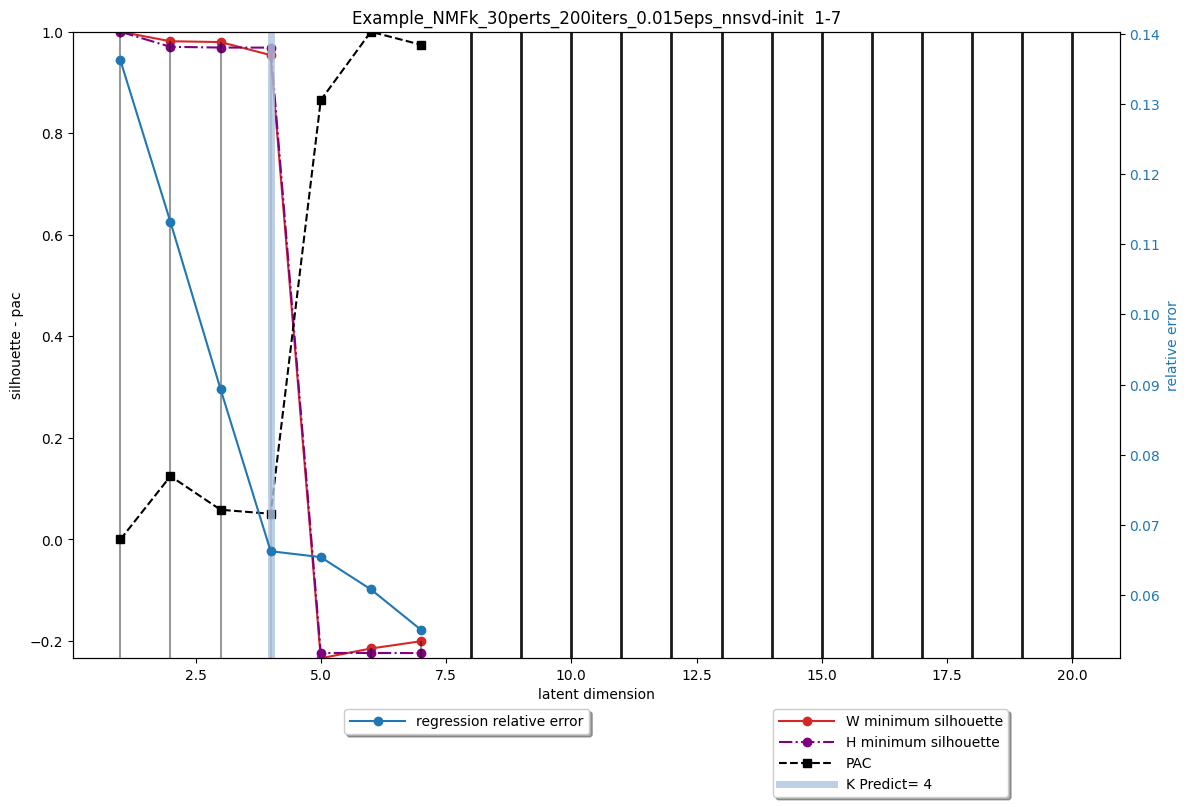

In [8]:
from IPython.display import Image
Image(filename=os.path.join(f'{model.save_path_full}', "FINAL_k=1-20.png")) 

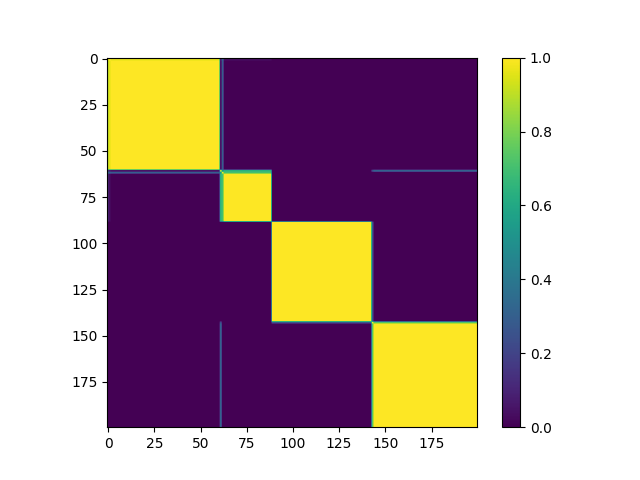

In [9]:
from IPython.display import Image

Image(filename=os.path.join(f'{model.save_path_full}', 'k_4_con_mat.png')) 